In [28]:
import pandas as pd
import numpy as np

In [29]:
emp_data = pd.read_csv('HR_comma_sep.csv')

In [30]:
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
emp_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [32]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [33]:
columns = emp_data.columns.tolist()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [35]:
categorical  = ['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

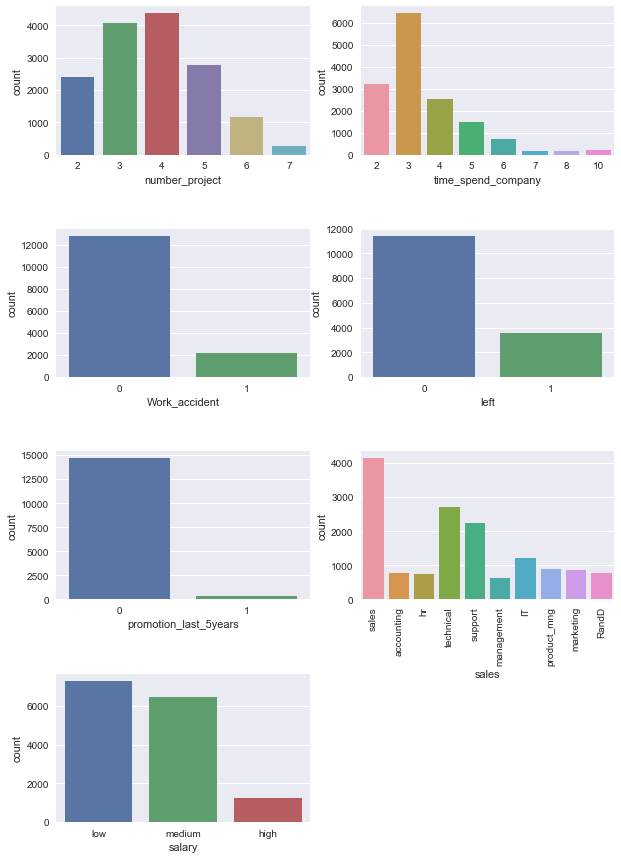

In [36]:
fig=plt.subplots(figsize=(10,15))
length = len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i, data= emp_data)
    
plt.subplot(np.ceil(length/2),2,6)
plt.xticks(rotation=90)
    

In [37]:
l = zip(categorical,range(6))

In [38]:
next(l)

('number_project', 0)

In [39]:
next(l)

('time_spend_company', 1)

In [40]:
emp_data.shape

(14999, 10)

In [41]:
categorical  = ['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']

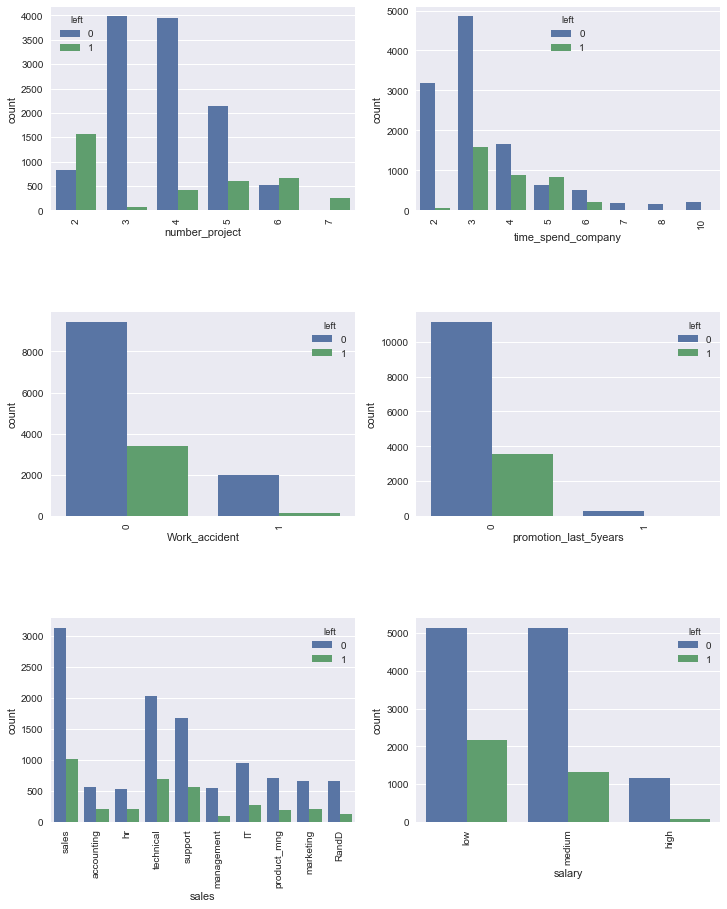

In [42]:
fig=plt.subplots(figsize=(12,15))

length = len(categorical)

for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    #Based on left colum, splits the data
    sns.countplot(x=i,data = emp_data, hue="left")
    plt.xticks(rotation=90)

### Observations
* Those who were promoted in last 5 years didn't leave the company
* Those who have spent 5 years in company are more in proportion compared to people staying back
* More than 6 years, people dont leave company anymore
* People who have done more than 7 projects have left the company.
* more than 6 years expr are not leaving company & more than 7 years are not staying back. So, folks who have done many projects faster are leaving company

In [43]:
# here we will do it only for categorical variable
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','sales','salary']
length = len(categorical)

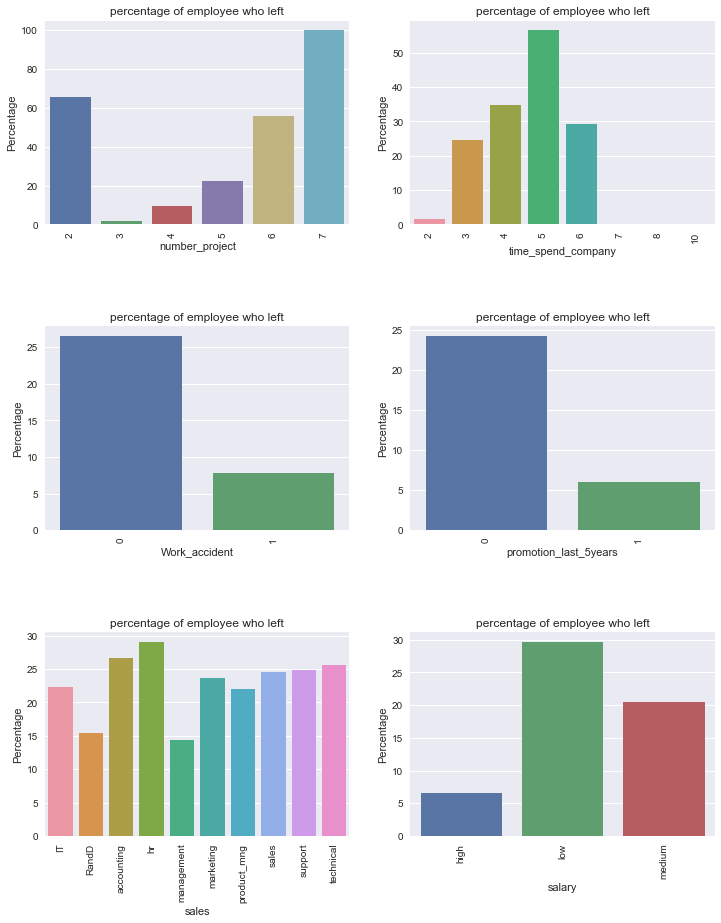

In [48]:
fig=plt.subplots(figsize=(12,15))
for i,j in itertools.zip_longest(categorical,range(length)):
    # only counting the number who left 
    Proportion_of_data = emp_data.groupby([i])['left'].agg(lambda x: (x==1).sum()).reset_index()
    
    # Counting the total number 
    Proportion_of_data1=emp_data.groupby([i])['left'].count().reset_index() 
    
    # mergeing two data frames
    Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on=i) 
    
    # Now we will calculate the % of employee who left category wise
    Proportion_of_data2["Proportion"]=(Proportion_of_data2['left_x']/Proportion_of_data2['left_y'])*100 
    
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
    plt.xticks(rotation=90)
    plt.title("percentage of employee who left")
    plt.ylabel('Percentage')


In [44]:
emp_data.groupby(['number_project'])['left'].agg(lambda x: (x==1).sum())

number_project
2    1567
3      72
4     409
5     612
6     655
7     256
Name: left, dtype: int64

In [46]:
emp_data.groupby(['number_project'])['left'].count()

number_project
2    2388
3    4055
4    4365
5    2761
6    1174
7     256
Name: left, dtype: int64

### Feature Engineering
* Find imp features for predition
* Randomforest for finding important feature prediction

In [49]:
corr = emp_data.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

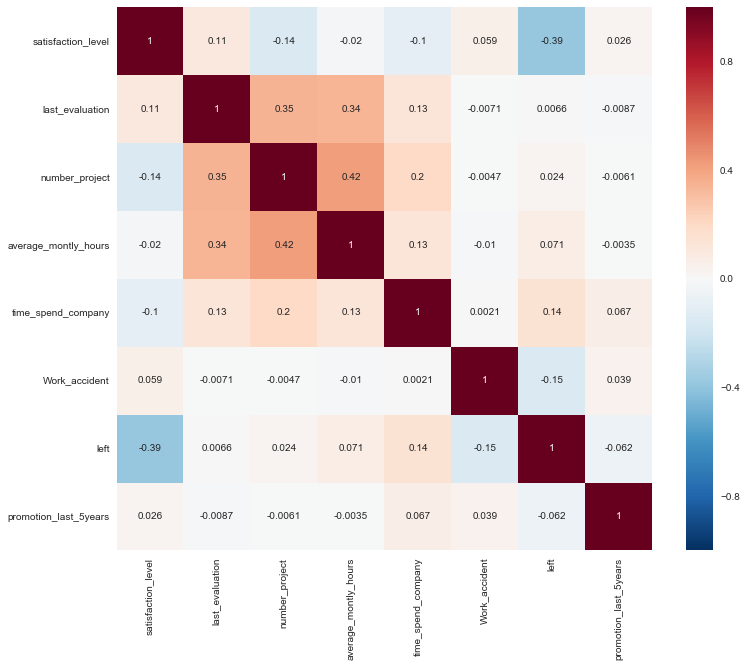

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cbar=True)
plt.xticks(rotation=90)

In [65]:
# For changing categorical variable into int
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
emp_data['salary'] = le.fit_transform(emp_data['salary'])
emp_data['sales'] = le.fit_transform(emp_data['sales'])

In [66]:
# we can select importance features by using Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100)

#Using all features except left
feature_var = emp_data.loc[:,emp_data.columns != "left"]

#Getting target features
pred_var = emp_data.loc[:,emp_data.columns == "left"]

In [62]:
pred_var.values.ravel()

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
model.fit(feature_var,pred_var.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [68]:
model.feature_importances_

array([ 0.34102804,  0.11960277,  0.17920463,  0.14841907,  0.18442702,
        0.00562742,  0.00094352,  0.01232269,  0.00842486])

In [70]:
feature_var.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [71]:
pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)

satisfaction_level       0.341028
time_spend_company       0.184427
number_project           0.179205
average_montly_hours     0.148419
last_evaluation          0.119603
sales                    0.012323
salary                   0.008425
Work_accident            0.005627
promotion_last_5years    0.000944
dtype: float64

In [80]:
# Importing Machine learning models library used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

In [81]:
def Classification_model(model,Data,x,y): # here x is the variable which are used for prediction
    # y is the prediction variable
    train,test = train_test_split(Data,test_size= 0.33)
    train_x = Data.loc[train.index,x] # Data for training only with features
    train_y = Data.loc[train.index,y] # Data for training only with predcition variable
    test_x = Data.loc[test.index,x] # same as for training 
    test_y = Data.loc[test.index,y]
    
    model.fit(train_x,train_y.values.ravel())
    
    pred=model.predict(test_x)
    
    accuracy=accuracy_score(test_y,pred)
    return accuracy

In [74]:
All_features=['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation',
'sales',
'salary',
'Work_accident',       
'promotion_last_5years']

In [75]:
Important_features = ['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation']

In [76]:
#Target Variable
Pred_var = ["left"]

In [77]:
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

In [78]:
Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]

In [79]:
Model_Accuracy = []

In [82]:
for model in Classification_models:
    Accuracy=Classification_model(model,emp_data,Important_features,Pred_var)
    Model_Accuracy.append(Accuracy)

In [83]:
Model_Accuracy

[0.99252525252525248,
 0.81070707070707071,
 0.95191919191919194,
 0.76727272727272722,
 0.95474747474747479]

In [86]:
Model_Accuracy = []
for model in Classification_models:
    Accuracy=Classification_model(model,emp_data,All_features,Pred_var)
    Model_Accuracy.append(Accuracy)

In [87]:
Model_Accuracy

[0.99090909090909096,
 0.79595959595959598,
 0.93373737373737375,
 0.76848484848484844,
 0.95212121212121215]